In [1]:
# Import the necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
data = pd.read_csv('/creditcard.csv')

In [3]:
# Data Exploration

# Columns available in the dataset
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
# Display the first few rows
print(data.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [5]:
# Describe the dataset
print(data.describe())

              Time           V1           V2           V3           V4  \
count  5974.000000  5974.000000  5974.000000  5974.000000  5974.000000   
mean   2677.615501    -0.266159     0.285505     0.844231     0.104200   
std    1765.025532     1.395405     1.208867     1.031448     1.442339   
min       0.000000   -12.168192   -15.732974   -12.389545    -4.657545   
25%    1162.250000    -1.015749    -0.280054     0.295701    -0.839417   
50%    2537.000000    -0.420703     0.346083     0.882882     0.161767   
75%    3781.750000     1.115402     0.941548     1.504158     1.071412   
max    6645.000000     1.685314     7.467017     4.101716     6.013346   

                V5           V6           V7           V8           V9  ...  \
count  5974.000000  5974.000000  5974.000000  5974.000000  5974.000000  ...   
mean      0.000709     0.194948     0.018324    -0.039006     0.396916  ...   
std       1.185900     1.365525     1.059870     1.304005     1.047749  ...   
min     -32.09212

In [6]:
# Information of dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5974 entries, 0 to 5973
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    5974 non-null   int64  
 1   V1      5974 non-null   float64
 2   V2      5974 non-null   float64
 3   V3      5974 non-null   float64
 4   V4      5974 non-null   float64
 5   V5      5974 non-null   float64
 6   V6      5974 non-null   float64
 7   V7      5974 non-null   float64
 8   V8      5974 non-null   float64
 9   V9      5974 non-null   float64
 10  V10     5974 non-null   float64
 11  V11     5974 non-null   float64
 12  V12     5974 non-null   float64
 13  V13     5974 non-null   float64
 14  V14     5974 non-null   float64
 15  V15     5974 non-null   float64
 16  V16     5974 non-null   float64
 17  V17     5974 non-null   float64
 18  V18     5973 non-null   float64
 19  V19     5973 non-null   float64
 20  V20     5973 non-null   float64
 21  V21     5973 non-null   float64
 22  

In [7]:
# Data Cleaning: Checking for missing values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [8]:
# Determine number of fraud cases in dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]
outlierFraction = len(fraud) / float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1])))
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

0.0005025125628140704
Fraud Cases: 3
Valid Transactions: 5970


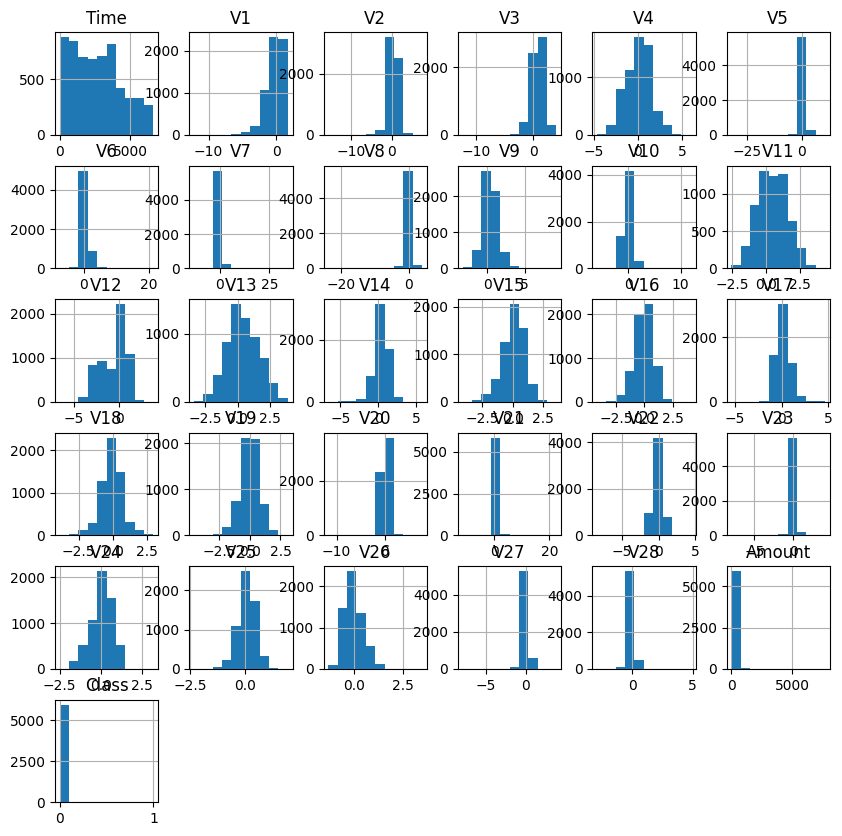

In [9]:
# Data Visualization

# Histogram
data.hist(bins=10, figsize=(10,10))
plt.show()

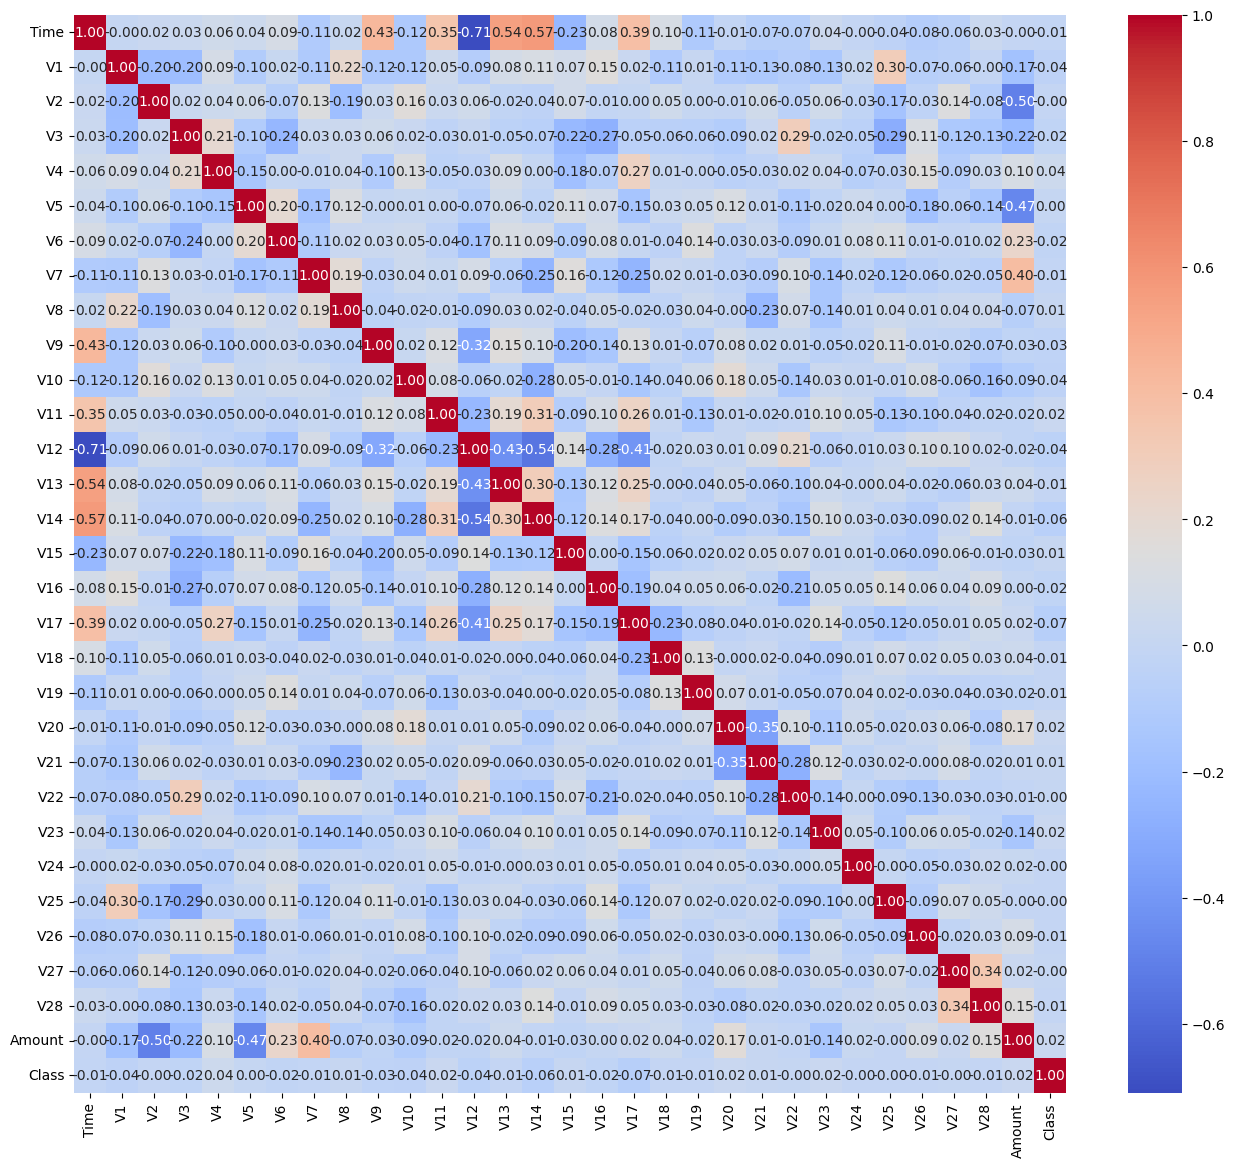

In [10]:
# Correlation heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

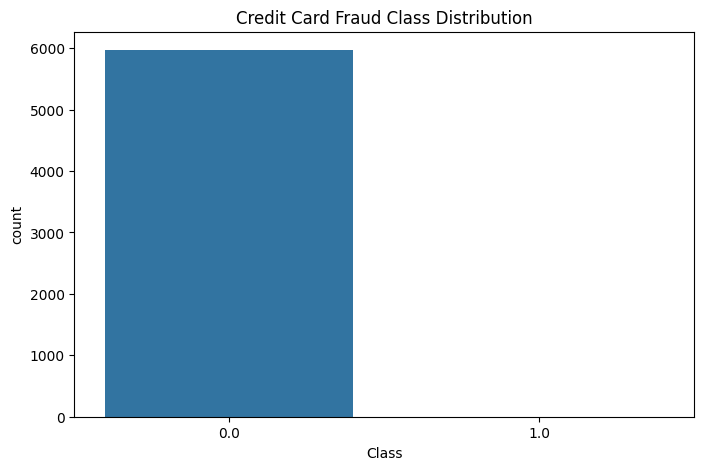

In [11]:
# Count plot of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='Class', data=data)
plt.title('Credit Card Fraud Class Distribution')
plt.show()

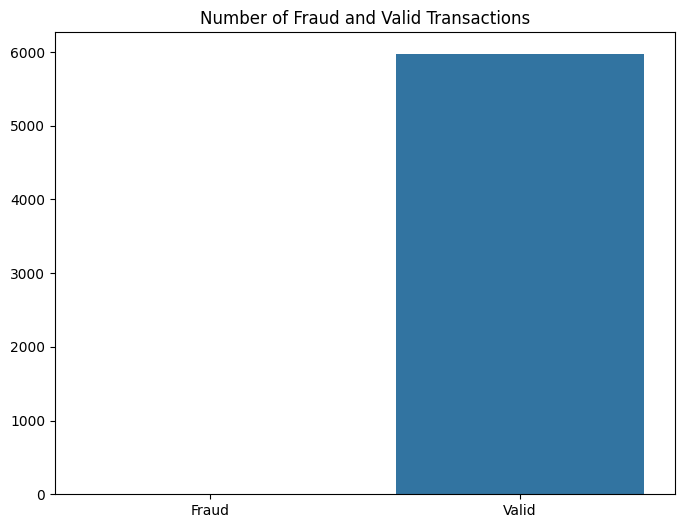

In [12]:
# Bar plot of fraud and valid transactions
plt.figure(figsize=(8, 6))
sns.barplot(x=['Fraud', 'Valid'], y=[len(fraud), len(valid)])
plt.title('Number of Fraud and Valid Transactions')
plt.show()

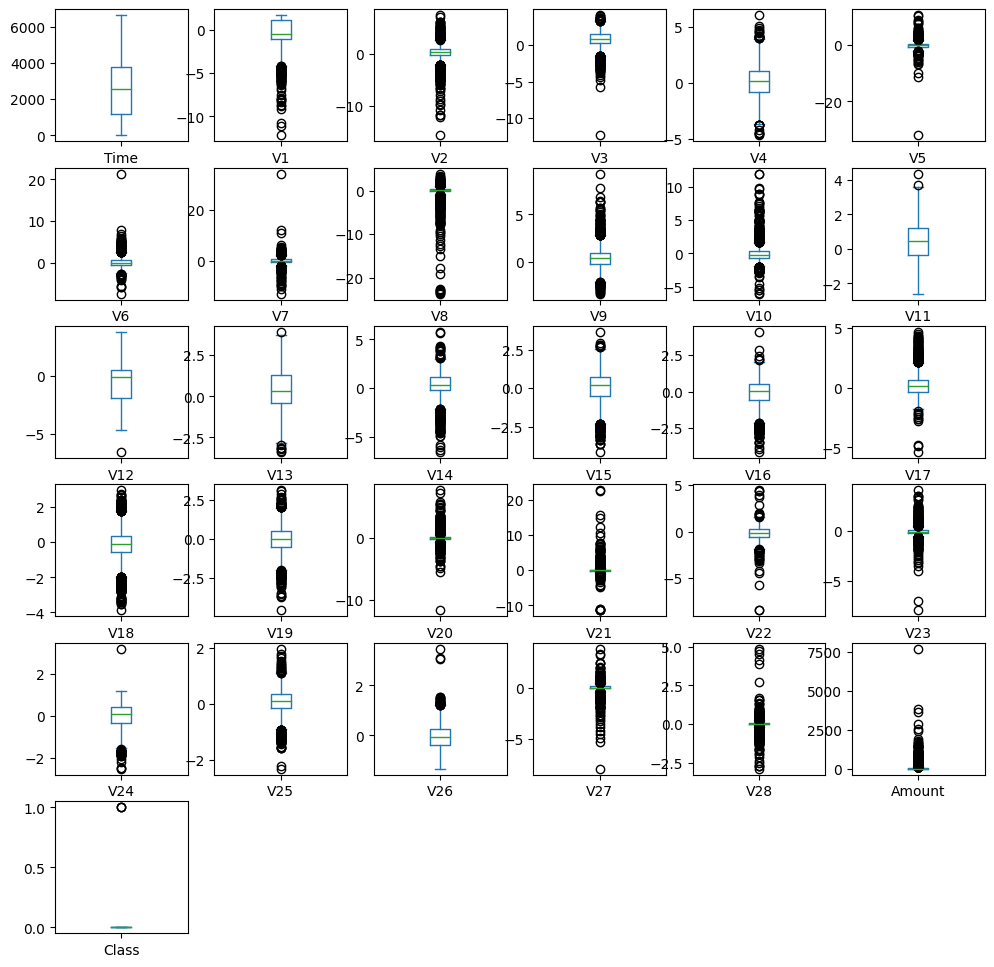

In [13]:
# Box plot
data.plot(kind='box', subplots=True, layout=(6, 6), sharex=False, sharey=False, figsize=(12, 12))
plt.show()

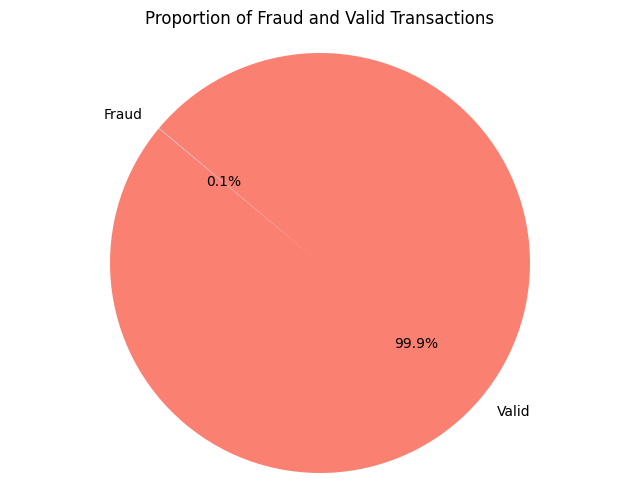

In [14]:
# Pie chart of fraud and valid transactions
plt.figure(figsize=(8, 6))
plt.pie([len(fraud), len(valid)], labels=['Fraud', 'Valid'], autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Proportion of Fraud and Valid Transactions')
plt.axis('equal')
plt.show()

In [15]:
# Removing outliers
print(f"Original data shape: {data.shape}")
from scipy import stats
non_outliers = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
print(f"Data shape before preprocessing: {data.shape}")

Original data shape: (5974, 31)
Data shape before preprocessing: (5974, 31)


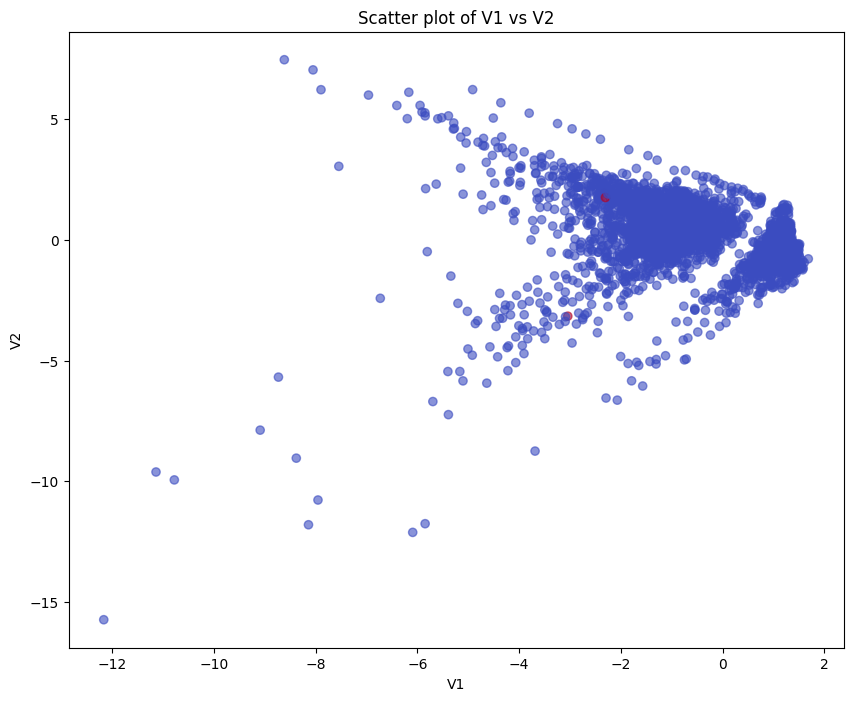

In [16]:
# Scatter plot after removing outliers
plt.figure(figsize=(10, 8))
plt.scatter(data['V1'], data['V2'], c=data['Class'], cmap='coolwarm', alpha=0.6)
plt.title('Scatter plot of V1 vs V2')
plt.xlabel('V1')
plt.ylabel('V2')
plt.show()

In [17]:
# Handling NaN values by dropping rows containing them
data.dropna(inplace=True)

# Ensuring no NaN values
print(data.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [18]:
# Splitting the data into features and target
X = data.drop(columns='Class', axis=1)
y = data['Class']

In [19]:
from imblearn.over_sampling import RandomOverSampler

# Apply random oversampling to balance the dataset
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)

In [20]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4778, 30), (1195, 30), (4778,), (1195,))

In [22]:
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# List of models to train
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Naive Bayes": GaussianNB()
}

In [24]:
# Training and evaluating each model
accuracies = []
plt.figure(figsize=(10, 8))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((name, accuracy))
    print(f"{name} Accuracy: {accuracy:.2f}")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("-" * 60)

Logistic Regression Accuracy: 1.00
[[1193    1]
 [   1    0]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1194
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1195
   macro avg       0.50      0.50      0.50      1195
weighted avg       1.00      1.00      1.00      1195

------------------------------------------------------------
Support Vector Machine Accuracy: 1.00
[[1194    0]
 [   1    0]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1194
         1.0       0.00      0.00      0.00         1

    accuracy                           1.00      1195
   macro avg       0.50      0.50      0.50      1195
weighted avg       1.00      1.00      1.00      1195

------------------------------------------------------------
K-Nearest Neighbors Accuracy: 1.00
[[1194    0]
 [   1    0]]
              precision    recall  

<Figure size 1000x800 with 0 Axes>

(1195,)


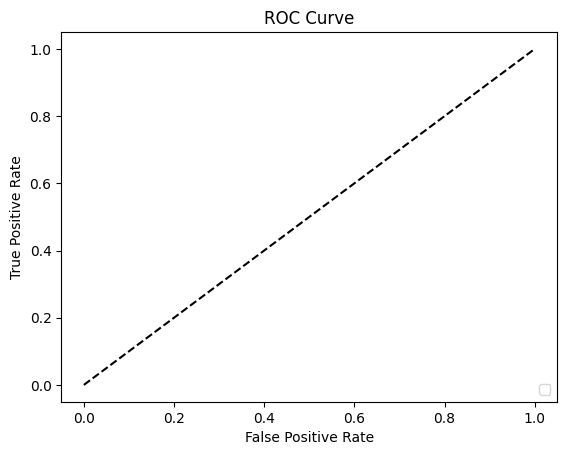

In [25]:
# Check the shape of y_pred
print(y_pred.shape)

# Remove the extra row from y_pred if necessary
if y_pred.shape[0] != y_test.shape[0]:
    y_pred = y_pred[:-1]

# ROC Curve
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_score = model.decision_function(X_test_scaled)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [26]:
# Example: Predicting with the best model
best_model = LogisticRegression()
best_model.fit(X_train, y_train)
sample_data = np.array([1.0693735878819,0.287722129331455,0.828612726634281,2.71252042961718,-0.178398016248009,0.337543730282968,-0.0967168617395962,0.115981735546597,-0.221082566236194,0.460230444301678,-0.773656930526689,0.32338724546722,-0.0110758870883779,-0.178485175177916,-0.65556427824926,-0.19992517131173,0.1240054151819,-0.980496201537345,-0.982916082135047,-0.153197231044512,-0.0368755317335273,0.0744124028162195,-0.0714074332998586,0.104743752596029,0.548264725394119,0.104094153162781,0.0214910583643189,0.021293311477486,27.5,"0"])
sample_data_2d = sample_data.reshape(1, -1)
sample_data_scaled = scaler.transform(sample_data_2d)
prediction = best_model.predict(sample_data_scaled)

In [27]:
# Mapping the prediction to readable output
outcome_map = {0: 'Not Fraudulent', 1: 'Fraudulent'}
predicted_outcome = outcome_map[prediction[0]]
print(f"Predicted Outcome: {predicted_outcome}")

Predicted Outcome: Not Fraudulent
